In [1]:
import database.fetch as fetch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import common.dates as dates
import load

In [2]:
def plot_finance(vix_df, spx_df, group="D"):
    # adapted from matplotlib tutorial
    def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return date[thisind].strftime('%Y-%m-%d')
    
    
    vix_df = dates.group_data(vix_df, ['close'], method='lastValue', group=group)
    spx_df = dates.group_data(spx_df, ['close'], method='lastValue', group=group)
    vix_df = vix_df.set_index('datetime', drop=False)
    spx_df = spx_df.set_index('datetime', drop=False)
    #remove NaT values
    vix_df = vix_df[vix_df['datetime'].notnull()]
    spx_df = spx_df[spx_df['datetime'].notnull()]




    fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
    
    
    date = vix_df['datetime'].astype('O')
    N = len(vix_df)
    ind = np.arange(N)  # the evenly spaced plot indices
    ax = axes[1]
    ax.plot(ind, vix_df['close'])
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.set_title("VIX Close Price from 2020-03-02 to 2020-04-07")
    fig.autofmt_xdate()
    
    
    date = spx_df['datetime'].astype('O')
    N= len(spx_df)
    ind = np.arange(N)  # the evenly spaced plot indices
    ax = axes[0]
    ax.plot(ind, spx_df['close'])#, 'o-')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.set_title("SPX Close Price from 2020-03-02 to 2020-04-07")
    fig.autofmt_xdate()

    plt.show()

In [3]:


def plot_finance2(vix_df, spx_df, group='D'):
    # adapted from matplotlib tutorial
    def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return date[thisind].strftime('%Y-%m-%d')
    

    
    vix_df = dates.group_data(vix_df, ['close'], method='lastValue', group=group)
    spx_df = dates.group_data(spx_df, ['close'], method='lastValue', group=group)
    vix_df = vix_df.set_index('datetime', drop=False)
    spx_df = spx_df.set_index('datetime', drop=False)
    #remove NaT values
    vix_df = vix_df[vix_df['datetime'].notnull()]
    spx_df = spx_df[spx_df['datetime'].notnull()]

    fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
    
    
    date = vix_df['datetime'].astype('O')
    N = len(vix_df)
    ind = np.arange(N)  # the evenly spaced plot indices
    ax = axes[1]
    ax.plot(ind, vix_df['close'].diff())
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.set_title("VIX Close Price Difference from 2020-03-02 to 2020-04-07")
    fig.autofmt_xdate()
    
    
    date = spx_df['datetime'].astype('O')
    N= len(spx_df)
    ind = np.arange(N)  # the evenly spaced plot indices
    ax = axes[0]
    ax.plot(ind, spx_df['close'].diff())#, 'o-')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.set_title("SPX Close Price Difference from 2020-03-02 to 2020-04-07")
    fig.autofmt_xdate()

    plt.show()

In [4]:
vix_df, spx_df = fetch.fetch_vix(), fetch.fetch_spx()

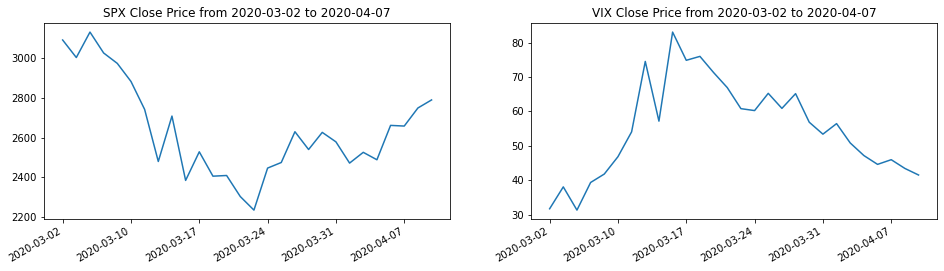

In [14]:
plot_finance(vix_df, spx_df)
#plt.savefig("writeup\\nltk_sent_hist_no_neut.png")

In the above figures we see the prices of the SPX and VIX. The close price is displayed on the one minute interval and weekends and other gaps in data are excluded to allow for a smoother display. We notice that the Vix and the SPX seem to be negatively corelated. It is worth noting that while this project coincided with historical market movements due to the Covid-19 epidemic and a 30% drop in SPX value, as can be observed from 2020-03-02 to 2020-03-24 is abnormal to say the least. The VIX increased its value by about 50% in that same time frame.

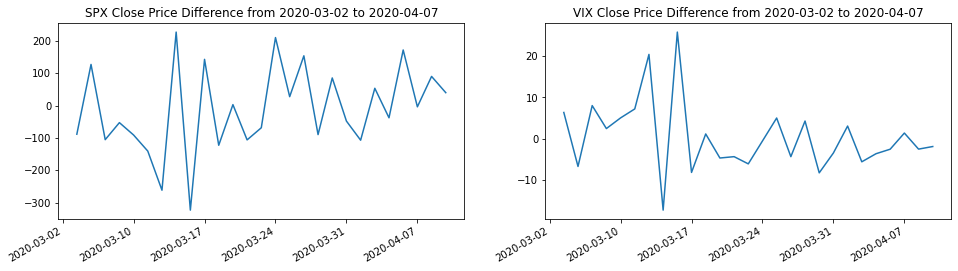

In [6]:
plot_finance2(vix_df, spx_df)

To make this inverse corelation even more apparent, the above figures plot price change of both indexes on a daily basis.

In [7]:
# Also nltk vs flair over time

In [8]:
tweet_df = fetch.fetch_tweets()
user_df = fetch.fetch_users()
tweet_df = load.remove_neutral_sentiment(tweet_df)
tweet_df = load.weight_sentiment(tweet_df, user_df)
for s in ['nltk','flair']:
     tweet_df = load.normalize(tweet_df, s)

In [9]:
def plot_sentiment_over_time(tweet_df, group='12H'):
    
    tweet_df = dates.group_data(tweet_df, ['nltk', 'flair'], method='avg', group=group)
    fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
    ind=tweet_df.index
    axes[0].plot(ind, tweet_df['nltk'], 'o-')
    axes[0].set_title("NLTK Tweet Sentiment on Select Financial Accounts (" + group + " )")
    axes[1].plot(ind, tweet_df['flair'], 'o-')
    axes[1].set_title("Flair Tweet Sentiment on Select Financial Accounts(" + group + " )")
    plt.show()


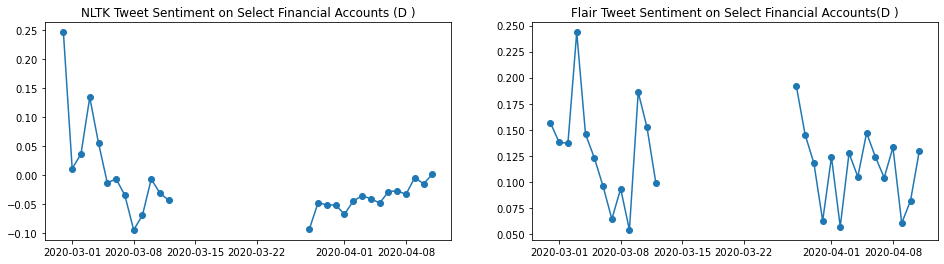

In [10]:
plot_sentiment_over_time(tweet_df, "D")

plot_finance(vix_df, spx_df)

In [15]:
def plot_eureka(spx_df, tweet_df, group="1440T"):
    # adapted from matplotlib tutorial
    def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return date[thisind].strftime('%Y-%m-%d')
    
    
    spx_df = dates.group_data(spx_df, ['close'], method='lastValue', group=group)
    spx_df = spx_df.set_index('datetime', drop=False)
    #remove NaT values
    spx_df = spx_df[spx_df['datetime'].notnull()]
    
    fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
    
    date = spx_df['datetime'].astype('O')
    N= len(spx_df)
    ind = np.arange(N)  # the evenly spaced plot indices
    ax = axes[0]
    ax.plot(ind, spx_df['close'])#, 'o-')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.set_title("SPX Close Price from 2020-03-02 to 2020-04-07")
    fig.autofmt_xdate()
    
    tweet_df = dates.group_data(tweet_df, ['nltk', 'flair'], method='avg', group=group)
    ind=tweet_df.index
    ax = axes[1]
    axes[1].plot(ind, tweet_df['nltk'], 'o-')
    axes[1].set_title("NLTK Tweet Sentiment on Select Financial Accounts (" + group + " )")
    plt.show()

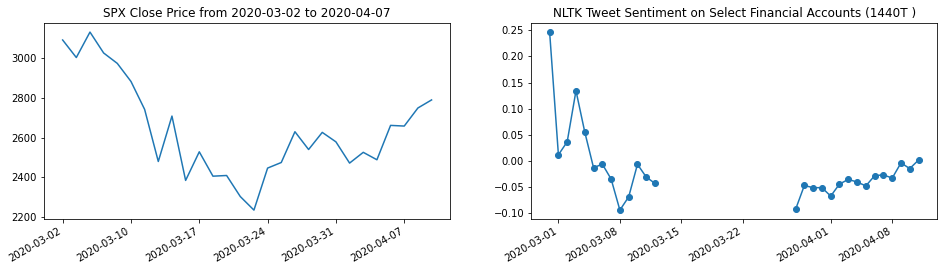

In [16]:
spx_df = fetch.fetch_spx()
tweet_df = fetch.fetch_tweets()
user_df = fetch.fetch_users()
tweet_df = load.remove_neutral_sentiment(tweet_df)
tweet_df = load.weight_sentiment(tweet_df, user_df)
for s in ['nltk','flair']:
     tweet_df = load.normalize(tweet_df, s)
plot_eureka(spx_df, tweet_df)

The above figures would suggest a correlation between SPX close price and sentiment expressed on twitter from select twitter accounts.

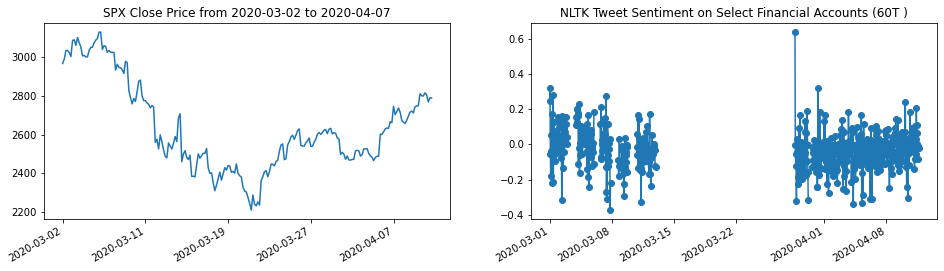

In [18]:
spx_df = fetch.fetch_spx()
tweet_df = fetch.fetch_tweets()
user_df = fetch.fetch_users()
tweet_df = load.remove_neutral_sentiment(tweet_df)
tweet_df = load.weight_sentiment(tweet_df, user_df)
for s in ['nltk','flair']:
     tweet_df = load.normalize(tweet_df, s)
plot_eureka(spx_df, tweet_df, "60T")